In [2]:
import sys
sys.path.append('../')

In [3]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
import os
import glob
from tools import SiteAnalyzer
import pandas as pd
import numpy as np
import ase.io
from fairchem.demo.ocpapi import AdsorbateBindingSites
from fairchem.data.oc.core import Adsorbate, Bulk, Slab, AdsorbateSlabConfig


/home/hoon/anaconda3/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
system_name = "*N*NH_Mo3Pd_mp-1186014_(1, 1, 1)"
#"*N*NH_CuPd3_mp-1184119_(1, 1, 1)"
#"*N*NH_Mo3Pd_mp-1186014_(1, 1, 1)"
#"*N*NH_CuPd3_mp-1184119_(1,1,1)_0.063"
ocpdemo_path = f"/home/hoon/llm-agent/results/ocpdemo/{system_name}"

In [12]:
bulk_db_path = "/home/hoon/llm-agent/fairchem-forked/src/fairchem/data/oc/databases/pkls/bulks.pkl"
ads_db_path = "/home/hoon/llm-agent/fairchem-forked/src/fairchem/data/oc/databases/pkls/adsorbates.pkl"

In [13]:
with open(os.path.join(ocpdemo_path, 'result.json'), 'r') as f:
    results = AdsorbateBindingSites.from_json(f.read())
valid_energies = pd.read_pickle(os.path.join(ocpdemo_path, 'valid_energies.pkl'))

In [14]:
results.slabs[0].slab.metadata

SlabMetadata(other_fields={}, bulk_src_id='mp-1186014', millers=(1, 1, 1), shift=0.16666666666666669, top=True)

In [26]:
results.slabs[0].__dir__()

['slab',
 'configs',
 'system_id',
 'api_host',
 'ui_url',
 '__module__',
 '__annotations__',
 '__doc__',
 '__dict__',
 '__weakref__',
 '__dataclass_params__',
 '__dataclass_fields__',
 '__init__',
 '__repr__',
 '__eq__',
 '__hash__',
 '__match_args__',
 'dataclass_json_config',
 'to_json',
 'from_json',
 'to_dict',
 'from_dict',
 'schema',
 '__new__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [15]:
results.slabs[0].ui_url #__dir__() # .slab

'https://open-catalyst.metademolab.com/results/35c32f36-b7df-421c-ab37-6c2350cc2f88'

In [16]:
results.slabs[0].configs[0].energy_trajectory #__dir__()

[3.7704873085021973,
 3.692307472229004,
 3.6487255096435547,
 3.6063919067382812,
 3.5674242973327637,
 3.5288872718811035,
 3.495579719543457,
 3.4623403549194336,
 3.4363412857055664,
 3.4097185134887695,
 3.385709762573242,
 3.3620009422302246,
 3.3375797271728516,
 3.3140764236450195,
 3.290611743927002,
 3.267192840576172,
 3.2437801361083984,
 3.2203633785247803,
 3.1969187259674072,
 3.1738128662109375,
 3.150456428527832,
 3.1268765926361084,
 3.103057384490967,
 3.0800960063934326,
 3.0562751293182373,
 3.0323646068573,
 3.0083470344543457,
 2.9842209815979004,
 2.960002899169922,
 2.935685396194458,
 2.9112765789031982,
 2.8867878913879395,
 2.862229824066162,
 2.837636947631836,
 2.8130176067352295,
 2.7883963584899902,
 2.7637698650360107,
 2.7391488552093506,
 2.7147107124328613,
 2.690534830093384,
 2.666563034057617,
 2.6431288719177246,
 2.619544506072998,
 2.5960986614227295,
 2.5727550983428955,
 2.5495407581329346,
 2.526431083679199,
 2.5036113262176514,
 2.4806997

In [17]:
results.slabs[0].configs[0].to_ase_atoms() #.get_tags()

Atoms(symbols='HMo72N2Pd24', pbc=True, cell=[[11.22597599029541, 0.0, 6.8739280650396e-16], [5.612987995147705, 9.721980094909668, 6.8739280650396e-16], [0.0, 0.0, 34.37239074707031]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 66, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 94, 95]), calculator=SinglePointCalculator(...))

# Adsorption site visualization

In [49]:
ads = ocpdemo_path.split('/')[-1].split('_')[0]
bulk_id = ocpdemo_path.split('/')[-1].split('_')[2]
adsorbate = Adsorbate(adsorbate_smiles_from_db=ads, adsorbate_db_path=ads_db_path)
bulk = Bulk(bulk_src_id_from_db=bulk_id, bulk_db_path=bulk_db_path)

In [76]:
# set the target adslab by checking individual metadata
results.slabs[0].slab.metadata

target_adslab = results.slabs[0] 

miller = target_adslab.slab.metadata.millers
top = target_adslab.slab.metadata.top
shift = target_adslab.slab.metadata.shift
print(miller, top, shift)

slabs = Slab.from_bulk_get_specific_millers(bulk=bulk, specific_millers=miller)
for slab_candidate in slabs:
    if np.isclose(slab_candidate.shift, shift, atol=0.01) and slab_candidate.top == top:
        slab_selected = slab_candidate
        break
slab_atoms = slab_selected.atoms
adslabs_heur = AdsorbateSlabConfig(slab_selected, adsorbate, mode='heuristic')

adslabs_rand = AdsorbateSlabConfig(slab_selected, adsorbate, mode='random')
adslabs = [*adslabs_heur.atoms_list, *adslabs_rand.atoms_list]

(1, 1, 1) True 0.16666666666666669


/home/hoon/anaconda3/envs/llm/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/hoon/anaconda3/envs/llm/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


In [78]:
len(adslabs_heur.atoms_list)

9

In [65]:
# adsoprtion site
ads_sites = []

for config in adslabs:
    site_analyzer = SiteAnalyzer(config)
    site = site_analyzer.get_bound_atom_positions()
    site = np.array(site)
    if len(site) >1:
        # get the mean value
        site = np.mean(site, axis=0)
        
    elif len(site) == 1:
        site = site[0]
    elif len(site) == 0:
        site_analyzer = SiteAnalyzer(config, cutoff_multiplier=1.5)
        site = site_analyzer.get_bound_atom_positions()
        site = np.array(site)
        if len(site) >1:
            # get the mean value
            site = np.mean(site, axis=0)
        
        elif len(site) == 1:
            site = site[0]
    ads_sites.append(site)

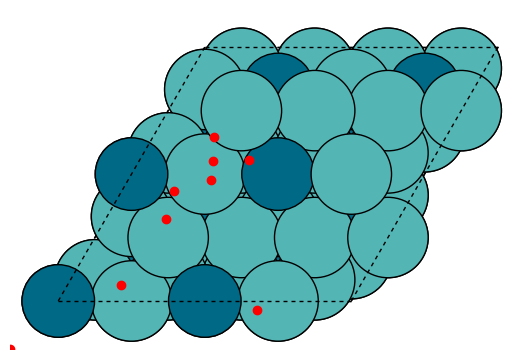

In [67]:
# plotting
fig, ax = plt.subplots()
ax.set_axis_off()
plot_atoms(slab_atoms)
for site in ads_sites:
    plt.scatter(*site[:2], marker='o', color='red')

plt.xlim(0, 19)
plt.ylim(-0, 13)
# save the figure
save_path = os.path.join(ocpdemo_path, 'ads_sites.png')
plt.savefig(save_path, bbox_inches='tight')

# Visualization and energy curve for the most stable adslab

In [18]:
valid_energies

{(0, 0): 0.5963156819343567,
 (0, 2): -0.3593468964099884,
 (0, 3): -0.22439193725585938,
 (0, 6): 0.8497255444526672,
 (0, 7): -0.3228195309638977,
 (0, 8): 0.19532036781311035,
 (0, 9): 0.20784533023834229,
 (0, 10): 0.4171951413154602,
 (0, 11): 0.653755247592926,
 (0, 12): 0.028963983058929443,
 (0, 13): 1.5011682510375977,
 (0, 14): 0.04264718294143677,
 (0, 15): 1.246077060699463,
 (0, 16): 0.5131515860557556,
 (0, 17): 0.4702600836753845,
 (0, 18): 0.7077232003211975,
 (0, 19): -0.05663323402404785,
 (0, 21): 0.48063474893569946,
 (0, 22): 0.668042004108429,
 (0, 23): 0.2370203137397766,
 (0, 24): -0.13823038339614868,
 (0, 25): 0.6324450373649597,
 (0, 26): 0.34213560819625854,
 (0, 28): 1.2848548889160156,
 (0, 29): 0.14745807647705078,
 (0, 30): 0.460604727268219,
 (0, 31): 0.71843022108078,
 (0, 32): 0.22315740585327148,
 (0, 33): -0.6642341017723083,
 (0, 35): 0.20781028270721436,
 (0, 36): 0.643899142742157,
 (0, 37): -0.5218672752380371,
 (0, 38): 1.2594337463378906,
 (0,

In [19]:
# find the min energy and its idx from valid_energies dictionary 
min_energy = 1e10
for idx, energy in valid_energies.items():
    slab_idx, config_idx = idx 
    if slab_idx == 0:
        if energy < min_energy:
            min_energy = energy
            min_idx = int(config_idx)

In [20]:
min_energy

-0.9548668265342712

In [21]:
results.slabs[0].configs[min_idx].to_ase_atoms()

Atoms(symbols='HMo72N2Pd24', pbc=True, cell=[[11.22597599029541, 0.0, 6.8739280650396e-16], [5.612987995147705, 9.721980094909668, 6.8739280650396e-16], [0.0, 0.0, 34.37239074707031]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 66, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 94, 95]), calculator=SinglePointCalculator(...))

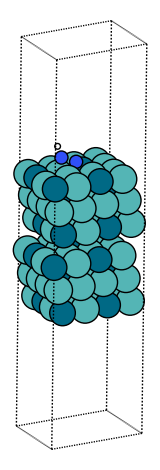

In [25]:
# visualize final structures
fig, ax = plt.subplots()
ax.set_axis_off()
relaxed_image = results.slabs[0].configs[min_idx].to_ase_atoms() #min_idx
plot_atoms(relaxed_image, ax, radii=0.8, rotation=("-75x, 45y, 10z"))

plt.tight_layout()
#save_path = os.path.join(ocpdemo_path, 'relaxed_adslab.png')
#plt.savefig(save_path, bbox_inches='tight')

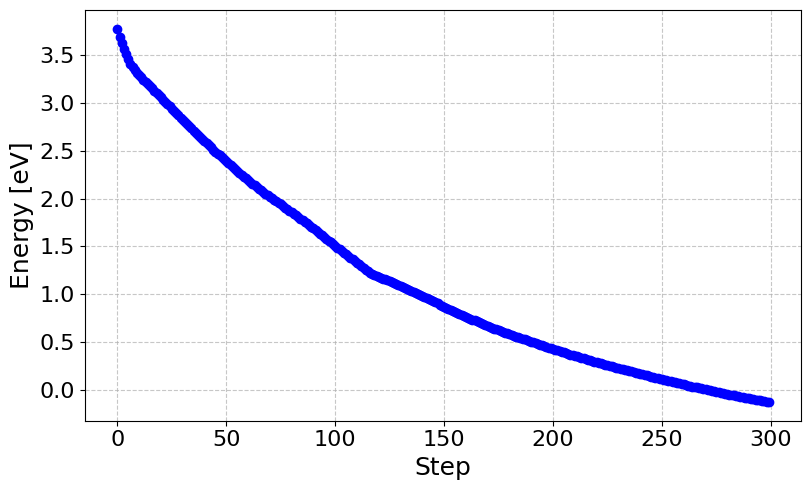

<Figure size 640x480 with 0 Axes>

In [32]:
# energy trajectory of the min energy traj
energies = results.slabs[0].configs[config_idx].energy_trajectory
# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the energy trajectory
ax.plot(energies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Set axis labels
ax.set_xlabel('Step', fontsize=18)
ax.set_ylabel('Energy [eV]', fontsize=18)
# tick size
ax.tick_params(axis='both', which='major', labelsize=16)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Set title
# # Display the plot
plt.tight_layout()
plt.show()

# save the figure
save_path = os.path.join(ocpdemo_path, 'energy_traj.png')
plt.savefig(save_path, bbox_inches='tight')